In [1]:
# Import libraries

#Basics
import os,sys
from pathlib import Path
import numpy as np
import pandas as pd
import json
from datetime import datetime,timedelta
from IPython.display import display


# Plotting
import matplotlib.pyplot as plt
#import matplotlib.ticker
import seaborn as sns

# Statistic / Algo
from scipy import stats
from bisect import bisect_left


# Local dependacies and APIs
parent_dir = os.path.abspath(os.path.join('..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import api.echoes_signal_processing_api
from api.util import *
# from lib.commandline import *


In [4]:
# Read the data logs from EchOES board
display(parent_dir)
with open(parent_dir + '/data/PCBway_status.json', 'rb') as json_file:
    pcbway_logs = json.load(json_file)
json_file.close()

with open(parent_dir + '/data/LEEMah_status.json', 'rb') as json_file:
    leemah_logs = json.load(json_file)
json_file.close()


'/home/kacao/TitanAES/Python-scripts'

In [5]:
# Failure rate
print("Total capture pcbway: {}, leemah: {}".format(len(pcbway_logs['logging_report']), 
                                                    len(leemah_logs['logging_report'])))
pcbway_failure_ratio = (pcbway_logs['failed_count'] + pcbway_logs['noises_count'])/len(pcbway_logs['logging_report'])
leemah_failure_ratio = (leemah_logs['failed_count'] + leemah_logs['noises_count'])/len(leemah_logs['logging_report'])

print ('pcbway failure rate: {}%'.format(round(pcbway_failure_ratio*100,4)))
print ('leemah failure rate: {}%'.format(round(leemah_failure_ratio*100,4)))


Total capture pcbway: 5000, leemah: 5000
pcbway failure rate: 0.02%
leemah failure rate: 51.66%


bad capture index: [1547], bad sample: [0, 1, 2, 3]
{0: 1, 1: 1, 2: 1, 3: 1}
4 [1, 1, 1, 1]


(None, None)

[1, 2, 3, 4]
PCBway - Occurence of bad index


,0,1,2,3
0,1,1,1,1


(array([0., 0., 1.]), array([1, 1, 1, 1]), <a list of 3 Patch objects>)

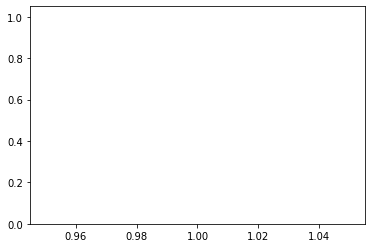

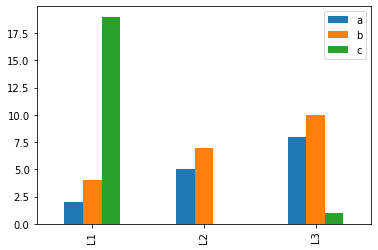

In [6]:
# Distribution of bad captures in an auto test
pcbway_badCapture = []
pcbway_badCapture_sample = []
leemah_badCapture = []
leemah_badCapture_sample = []

for index, aLog in enumerate(pcbway_logs['logging_report']):
    if len( pcbway_logs['logging_report'][index][str(index+1)] ) != 0:
        pcbway_badCapture.append(index+1)
        pcbway_badCapture_sample += pcbway_logs['logging_report'][index][str(index+1)]
        print ('bad capture index: {}, bad sample: {}'.format(pcbway_badCapture, pcbway_logs['logging_report'][index][str(index+1)]))

a = np.array(pcbway_badCapture_sample)
unique, counts = np.unique(a, return_counts=True)
result = dict(zip(unique, counts))

print(result), print (len(result.keys()), list(result.values()))
item = [key+1 for key, _ in result.items()]
print (item)

pcbway_badCapture_df = pd.DataFrame.from_dict([result])
print("PCBway - Occurence of bad index")
pcbway_badCapture_df.head()


plt.hist(item, list(result.values()), color='g', histtype='bar', rwidth=0.1)
d = {
    'a' : {'L1':2, 'L2':5, 'L3':8},
    'b' : {'L1':4, 'L2':7, 'L3':10},
    'c' : {'L1':19, 'L2':0, 'L3':1},
}

pd.DataFrame(d).plot(kind='bar')
# plt.show()


In [ ]:
# -------------------------------------------------------------#

# for index, aLog in enumerate(leemah_logs['logging_report']):
#     if len( leemah_logs['logging_report'][index][str(index+1)] ) != 0:
#         leemah_badCapture.append(index+1)
#         leemah_badCapture_sample += leemah_logs['logging_report'][index][str(index+1)]
        

# b = np.array(leemah_badCapture_sample)
# unique, counts = np.unique(b, return_counts=True)
# result = dict(zip(unique, counts))

# print (result)
# leemah_badCapture_df = pd.DataFrame.from_dict([result])
# print("LEEmah - Occurence of bad index")
# leemah_badCapture_df.head()

# plt.hist(result.key, result.values(), histtype='bar', rwidth=0.1)



# Distribution of bad samples in a capture
# plt.hist(leemah_badCapture_df,column='occurence_bad_index_per_capture')
# plt.hist(leemah_badCapture_df, bins = 10)